In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
aspect_ratio = 16 / 9

horizontal_opening_angle = 70 # °
vertical_opening_angle = horizontal_opening_angle / aspect_ratio # °

# half of the opening angle in radians

phi = (horizontal_opening_angle / 2) * (np.pi / 180)
theta = (vertical_opening_angle / 2) * (np.pi / 180)

print(phi, theta)

cam_pos = np.array([-5, 0, 1.5])
focus_point = np.array([0, 0, 1.5])

# cam dir is normalized vector connecting camera to focus point
cam_dir = (focus_point - cam_pos) / np.linalg.norm(focus_point - cam_pos)
cam_orthogonal_z = np.array([0, 0, 1])   # normalized vector
cam_orthogonal = np.cross(cam_dir, cam_orthogonal_z)   # normalized vector


0.6108652381980153 0.3436116964863836


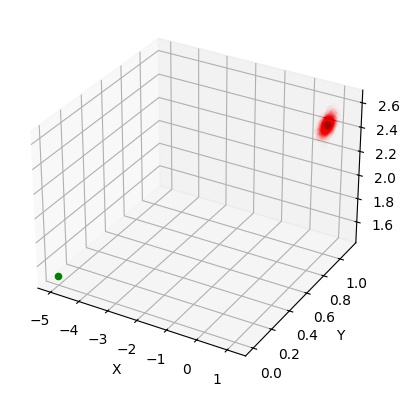

In [81]:

ball_pos = np.array([1, 1, 2.5])
ball_radius = 0.1143

# draw samples from 3-dim Gaussian distribution at ball_pos with std ball_radius / 1.644854 (This number means that the radius covers 90% of the distribution)

n_samples = 1000
samples = np.random.normal(loc=ball_pos, scale=ball_radius / 1.644854, size=(n_samples, 3))

# plot samples 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c='r', marker='o', alpha=0.01)
ax.scatter(ball_pos[0], ball_pos[1], ball_pos[2], c='b', marker='o')
ax.scatter(cam_pos[0], cam_pos[1], cam_pos[2], c='g', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

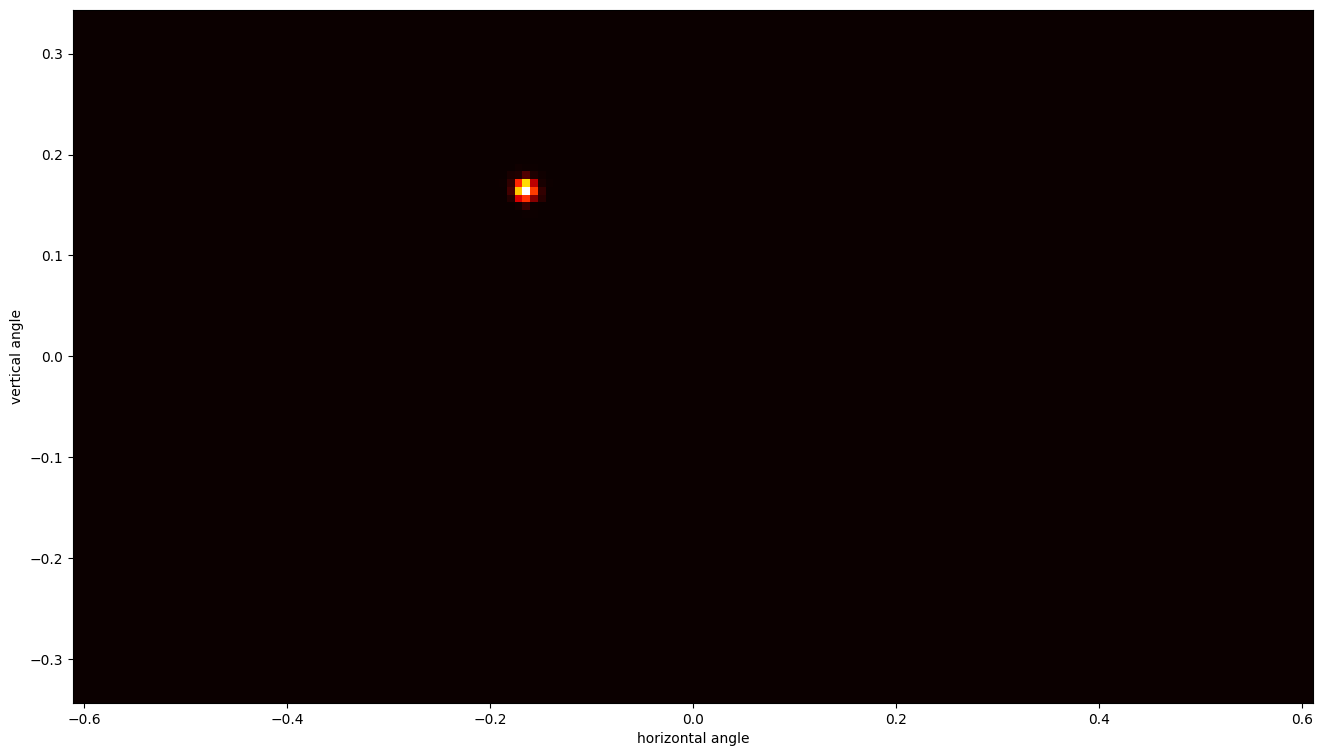

In [94]:
v = samples - cam_pos
v = v / np.linalg.norm(v, axis=1)[:, None]

# calculate the azimuthal angle ph between the camera direction and the vectors from the camera to the samples

project_on_cam_orthogonal = np.dot(v, cam_orthogonal)
project_on_cam_dir = np.dot(v, cam_dir)
ph = np.arctan2(project_on_cam_orthogonal, project_on_cam_dir)

# calculate the polar angle th between the camera direction and the vectors from the camera to the samples

project_on_cam_orthogonal_z = np.dot(v, cam_orthogonal_z)
project_on_cam_dir = np.dot(v, cam_dir)
th = np.arctan2(project_on_cam_orthogonal_z, project_on_cam_dir)


# plot 2d historam with horizontal and vertical angles limited by the camera angles

fig, ax = plt.subplots(figsize=(16, 9))
vals = ax.hist2d(ph, th, bins=[160, 90], range=[[-phi, phi], [-theta, theta]], density=True, cmap='hot')
ax.set_xlabel('horizontal angle')
ax.set_ylabel('vertical angle')
plt.show()



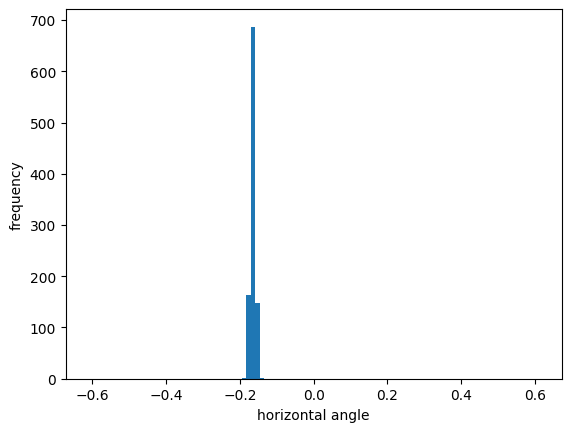

In [83]:
# plot horizontal distribution

fig, ax = plt.subplots()
ax.hist(ph, bins=100, range=[-phi, phi])
ax.set_xlabel('horizontal angle')
ax.set_ylabel('frequency')
plt.show()

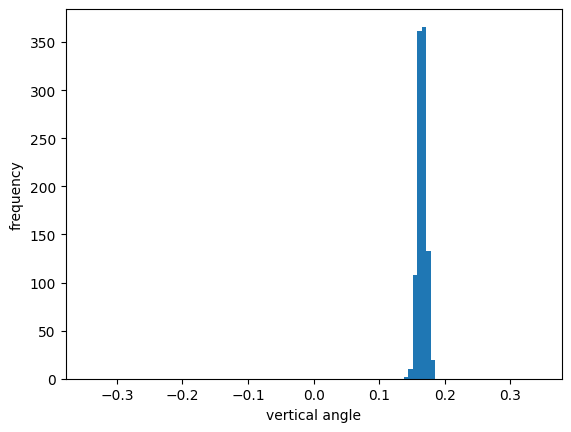

In [84]:
# plot vertical distribution 

fig, ax = plt.subplots()
ax.hist(th, bins=100, range=[-theta, theta])
ax.set_xlabel('vertical angle')
ax.set_ylabel('frequency')
plt.show()

In [50]:
print(v)

[[ 9.99957241e-01 -5.28517558e-03  7.58829875e-03]
 [ 9.99231148e-01  3.37401390e-02  1.99678609e-02]
 [ 9.99304526e-01  4.34543485e-03  3.70348581e-02]
 ...
 [ 9.99712400e-01  7.54299720e-04 -2.39697266e-02]
 [ 9.99282124e-01  2.50309484e-02  2.84374321e-02]
 [ 9.99857073e-01  1.57742630e-02  6.08332830e-03]]


In [104]:
for i in range(90):
    print(vals[0][90-i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

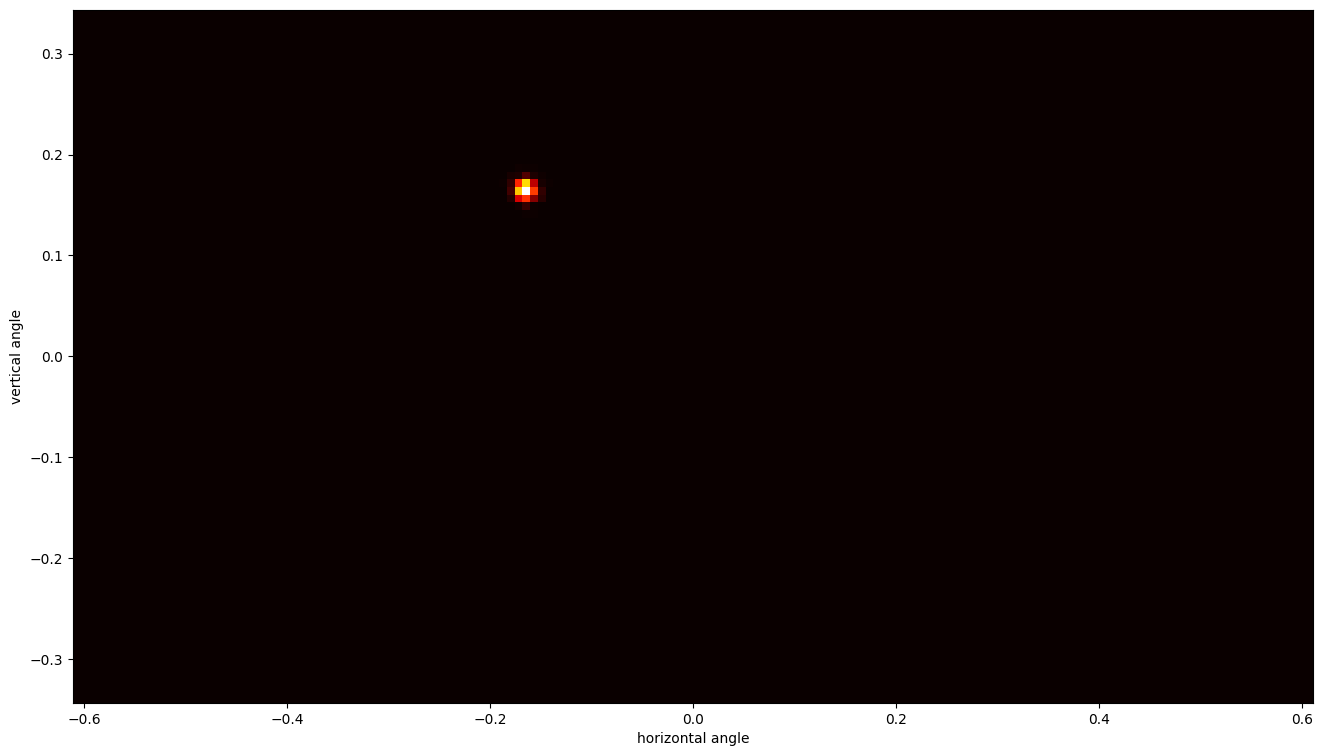

In [112]:
# visualise vals with vals[1, 2] as x and y axis

# reverse and transpose vals[0] to get the correct orientation

fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(np.flipud(vals[0].T), extent=[-phi, phi, -theta, theta], aspect='auto', cmap='hot')
ax.set_xlabel('horizontal angle')
ax.set_ylabel('vertical angle')
plt.show()



In [107]:
vals[2]

array([-0.3436117 , -0.33597588, -0.32834007, -0.32070425, -0.31306843,
       -0.30543262, -0.2977968 , -0.29016099, -0.28252517, -0.27488936,
       -0.26725354, -0.25961773, -0.25198191, -0.2443461 , -0.23671028,
       -0.22907446, -0.22143865, -0.21380283, -0.20616702, -0.1985312 ,
       -0.19089539, -0.18325957, -0.17562376, -0.16798794, -0.16035213,
       -0.15271631, -0.14508049, -0.13744468, -0.12980886, -0.12217305,
       -0.11453723, -0.10690142, -0.0992656 , -0.09162979, -0.08399397,
       -0.07635815, -0.06872234, -0.06108652, -0.05345071, -0.04581489,
       -0.03817908, -0.03054326, -0.02290745, -0.01527163, -0.00763582,
        0.        ,  0.00763582,  0.01527163,  0.02290745,  0.03054326,
        0.03817908,  0.04581489,  0.05345071,  0.06108652,  0.06872234,
        0.07635815,  0.08399397,  0.09162979,  0.0992656 ,  0.10690142,
        0.11453723,  0.12217305,  0.12980886,  0.13744468,  0.14508049,
        0.15271631,  0.16035213,  0.16798794,  0.17562376,  0.18